In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
def read_dat_file(file_path):
    rows=[]
    try:
        with open(file_path, 'r') as file:
            # Assuming it's a text file, you can read its contents line by line
            for line in file:
                mylist=line.split(",")
                rows.append(mylist)
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
    
    df=pd.DataFrame(rows[1:],columns=rows[0])
    df = df.replace('\n','', regex=True)
    return df

In [3]:
df = read_dat_file("slump_test.data")
columns = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.','Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)\n'];
df = df[columns].astype(float)
print(df.head())
print(df.info())
print(df.dtypes)

   Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

   FLOW(cm)  Compressive Strength (28-day)(Mpa)\n  
0      62.0                                 34.99  
1      20.0                                 41.14  
2      20.0                                 41.81  
3      21.5                                 42.08  
4      64.0                                 26.82  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               

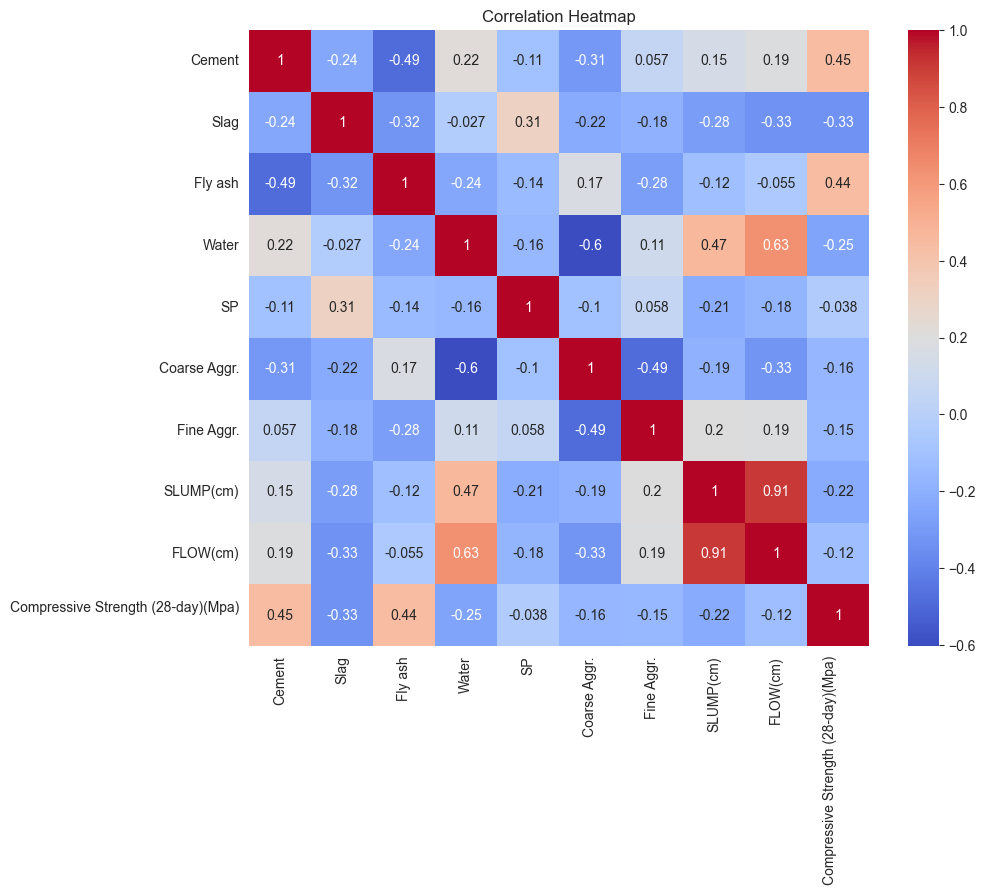

In [4]:
plt.figure(figsize = (10, 8))
correlations = df.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Training a linear regression model

In [5]:
import statsmodels.api as sm

y = df['Compressive Strength (28-day)(Mpa)\n']
x = df[columns[:-1]]
x = sm.add_constant(x)
model = sm.OLS(y.astype(float), x.astype(float)).fit()

### Calcuate Cook's distance

In [6]:
np.set_printoptions(suppress=True)

# get cook's distance score
influence = model.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([0.00017757, 0.00322575, 0.00722735, 0.01922633, 0.00006408,
       0.00000389, 0.00200318, 0.10987494, 0.04898007, 0.00000003,
       0.00881812, 0.01184301, 0.00433496, 0.11555077, 0.01950584,
       0.0080182 , 0.07150784, 0.00336047, 0.02643196, 0.0059661 ,
       0.0000024 , 0.05850075, 0.01487859, 0.00001605, 0.00206467,
       0.00420785, 0.00009547, 0.00008452, 0.01301225, 0.0042922 ,
       0.0005726 , 0.01263926, 0.00081947, 0.01026602, 0.01330239,
       0.00520156, 0.00117019, 0.00161099, 0.00356428, 0.01594353,
       0.01887827, 0.02984563, 0.00124239, 0.00086456, 0.01194327,
       0.00066367, 0.0004177 , 0.0107984 , 0.1335389 , 0.07332309,
       0.00004654, 0.00368284, 0.01373989, 0.00002363, 0.00127657,
       0.00283586, 0.00107903, 0.00288387, 0.00280618, 0.06863945,
       0.01114564, 0.00026062, 0.00019221, 0.02490529, 0.0014606 ,
       0.00820311, 0.00363678, 0.00145585, 0.01014122, 0.00015408,
       0.00424632, 0.00450934, 0.03572214, 0.00203326, 0.0034

### Visualize the cook's distance and find influencial points

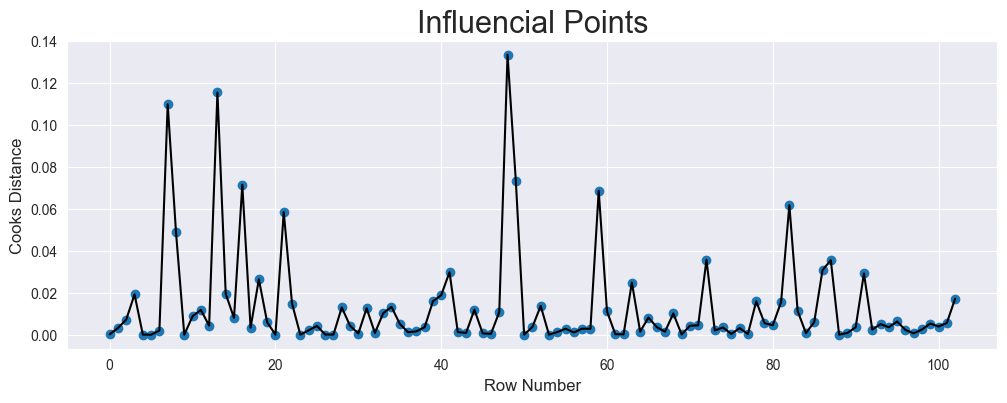

In [7]:
# Draw plot
plt.figure(figsize = (12, 4))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

#### Mean Cook's distance

In [8]:
mean_cooks = np.mean(cooks[0])
print(mean_cooks)

0.013578760719153565


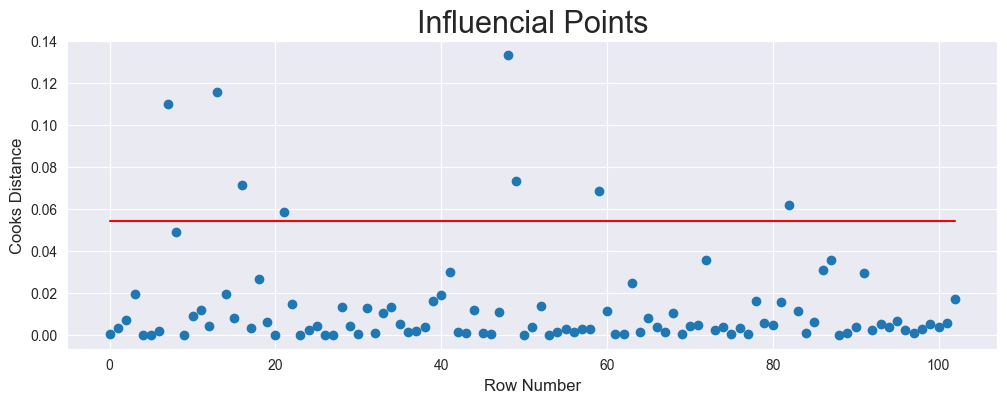

In [9]:
mean_cooks_list = [4*mean_cooks for i in df.index]
plt.figure(figsize = (12, 4))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [10]:
print('Influencial points')
influencial_points = df.index[cooks[0] > 4*mean_cooks]
df.iloc[influencial_points, :]

Influencial points


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)\n
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
13,354.0,0.0,0.0,234.0,6.0,959.0,691.0,17.0,54.0,33.91
16,153.0,0.0,239.0,200.0,6.0,1002.0,684.0,12.0,35.0,28.29
21,310.0,0.0,143.0,218.0,10.0,787.0,804.0,13.0,46.0,36.19
48,332.0,0.0,170.0,160.0,6.0,900.0,806.0,0.0,20.0,58.53
49,326.0,0.0,167.0,174.0,6.0,884.0,792.0,21.5,42.0,52.65
59,140.0,128.0,164.0,237.0,6.0,869.0,656.0,24.0,65.0,29.50
82,160.2,0.3,240.0,233.5,9.2,781.0,841.1,24.0,75.0,36.19


### Visualizing leverage points

In [11]:
lev = influence.hat_matrix_diag

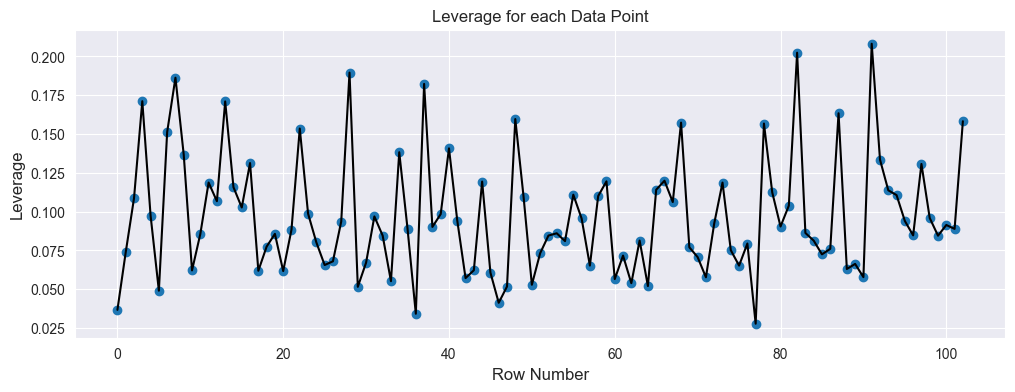

In [12]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

#### Mean Leverage
The rows which have leverage greater than 3x of mean leverage are taken as leverage points

In [13]:
mean_lev = np.mean(lev)
mean_lev_list = [3*mean_lev for i in df.index]

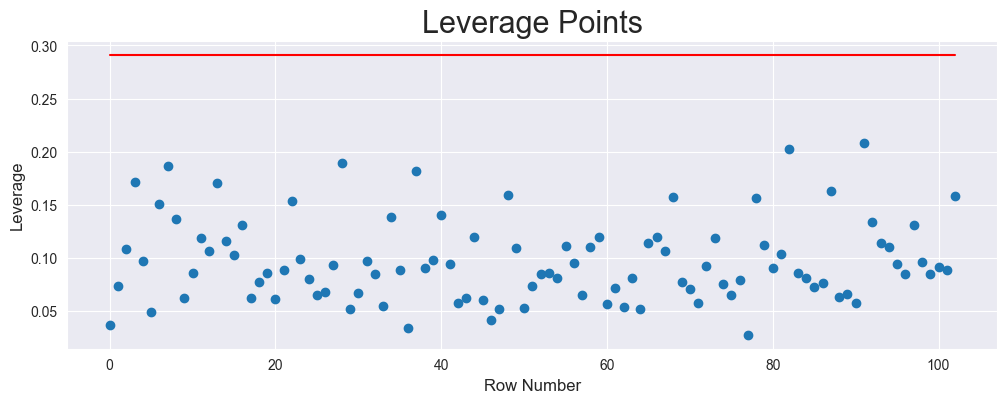

In [14]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, mean_lev_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage Points', fontsize = 22)
plt.show()

In [15]:
leverage_points = df.index[lev > (3 * mean_lev)]
print("LEVERAGE POINTS")
df.iloc[leverage_points, :]

LEVERAGE POINTS


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)\n


### Visualizing Outliers using residual

In [16]:
residuals = np.abs(model.resid)

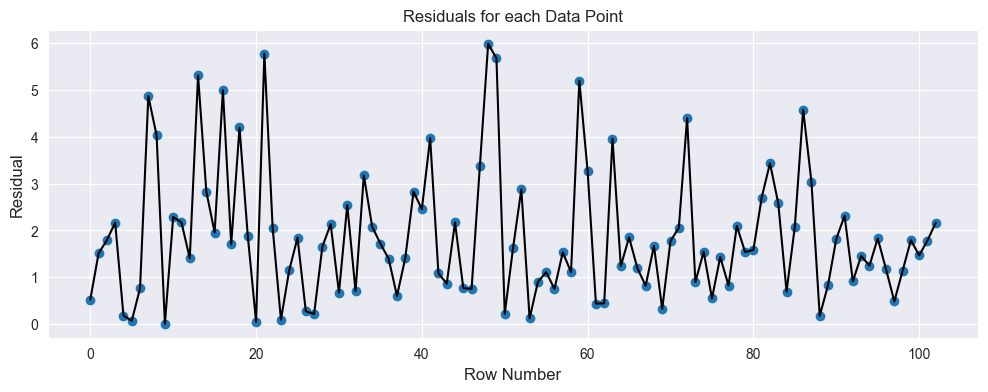

In [17]:

plt.figure(figsize = (12, 4))
plt.scatter(df.index, residuals)
plt.plot(df.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

#### Mean residual distance

In [18]:
mean_res = np.mean(residuals)
print(f'Mean: {mean_res}')

Mean: 1.8748103418092263


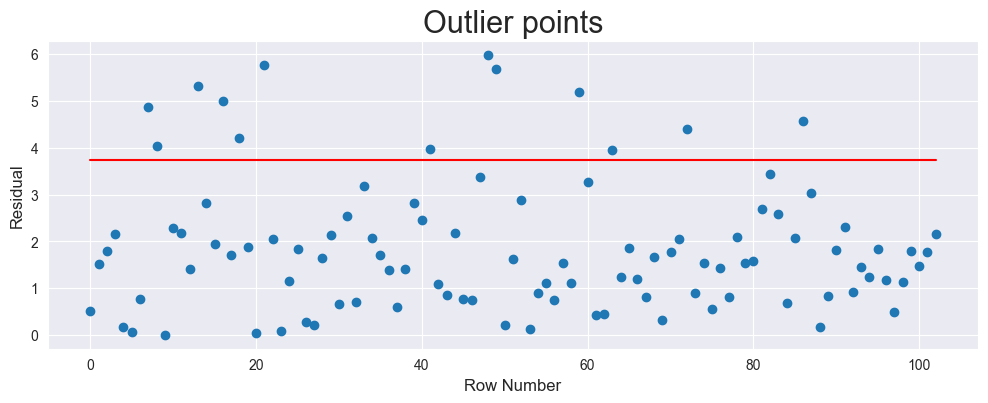

In [19]:
mean_res_list = [mean_res*2 for i in df.index]

plt.figure(figsize = (12, 4))
plt.scatter(df.index, residuals)
plt.plot(df.index, mean_res_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Outlier points', fontsize = 22)
plt.show()

In [20]:
outlier_points = df.index[residuals > (mean_res*2)]
print("OUTLIER POINTS")
df.iloc[outlier_points, :]

OUTLIER POINTS


,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)\n
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
13,354.0,0.0,0.0,234.0,6.0,959.0,691.0,17.0,54.0,33.91
16,153.0,0.0,239.0,200.0,6.0,1002.0,684.0,12.0,35.0,28.29
18,310.0,0.0,143.0,168.0,10.0,914.0,804.0,20.5,48.2,49.30
21,310.0,0.0,143.0,218.0,10.0,787.0,804.0,13.0,46.0,36.19
41,154.0,141.0,181.0,234.0,11.0,797.0,683.0,23.0,65.0,33.51
48,332.0,0.0,170.0,160.0,6.0,900.0,806.0,0.0,20.0,58.53
49,326.0,0.0,167.0,174.0,6.0,884.0,792.0,21.5,42.0,52.65
59,140.0,128.0,164.0,237.0,6.0,869.0,656.0,24.0,65.0,29.50
